# Applied Data Science Capstone Project

This a jupyter notebook for the final project of the Applied data science specialization from Coursera IBM path career
The project will use a car accident dataset to predict the severity of an accident.

# Introduction/Business Problem 

Nowadays the car is one of the most used medium to travel, to go to work, move between cities,etc. This phenomenon increases the number of cars in the streets and the possibilities of accidents between cars, cyclist or pedestrians.

Also conditions like location, weather, road staus, speed, light and others can influence  the accident odds and this could result in injuries, car and property damage, fatalities, financial impact, medical bills, emotional impact or long-term consequences.

Stakeholder groups that are affected for the car accidents are drivers, pedestrians, cyclist, local and regional authorities and others involved in the accidents.

Taking that in consideration the question or problem to be answered with this project is knowing certain conditions (weather, location, day, road status,etc) what is the probability to have a car accident predicting the severity of it.

This will help the stakeholders in different ways, for example:

- Avoiding to drive when there are some risky conditions
- Drive carefully due to certain conditions
- Reduce fatalities
- Reduce medical bills
- Minimizing fatal/injury car crash
- Identify locations with highest accidents rate and take actions


---
# DATA UNDERSTANDING
---

In order to address the problem, there is a dataset called **Collision -All Years** which has data for the Seattle city car accidents.
The file is in .csv format, and can be found in this link: [DATASET](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv), also a description for each file is [HERE](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

The dataset contains **194673** observations and **38** features or columns, this is the list of features:

| FIELD       | TYPE       | FIELD     | TYPE       | FIELD     | TYPE      | FIELD     | TYPE      | FIELD     | TYPE      |
| ----------- | ----------- |-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
|SEVERITYCODE | int64       |ADDRTYPE   | object    |PERSONCOUNT| int64     |SDOT_COLDESC|object    |SPEEDING   |object     |
|X            | float64     |INTKEY     | float64   |PEDCOUNT   | int64     |INATTENTIONIND|object  |ST_COLCODE |object     |
|Y            | floa64      |LOCATION   | object    |PEDCYLCOUNT| int64     |UNDERINFL  |object     |ST_COLDESC |object     |
|OBJECTID     | int64       |EXCEPTRSNCODE |object  |VEHCOUNT   | int64     |WEATHER    |object     |SEGLANEKEY |int64      |
|INCKEY       | int64       |EXCEPTRSNDESC |object  |INCDATE    | object    |ROADCOND   |object     |CROSSWALKKEY|int64     |
|COLDETKEY    | int64       |SEVERITYCODE.1|int64   |INCDTTM    | object    |LIGHTCOND  |object     |HITPARKEDCAR|object    |
|REPORTNO     | object      |SEVERITYDESC  |object  |JUNCTIONTYPE|object    |PEDROWNOTGRNT|object   |            |          |
|STATUS       | object      |COLLISIONTYPE |object  |SDOT_COLCODE|int64     |SDOTCOLNUM|float64     |            |          |

The first column **SEVERITYCODE** which describes the fatality of an accident will be used as the target or labeled data, the other columns have different types of attributes, many of the observations are good to train and test the machine learning model.

Analyzing the dataset 

- 6 of the features have many missing values, for the modelling those features that have more than 50% missing data will not be used for 
trainning or testing.

| FIELD       | %NaN VALUES      | FIELD          | %NaN Values  | FIELD        | %NaN Values  | 
| ----------- | ---------------- |----------------|--------------|--------------|--------------|
|INTKEY       | 66.57%           | EXCEPTRSNDESC  | 97.10%       |INATTENTIONIND| 84.69%       |
|PEDROWNOTGRNT| 97.60%           | SPEEDING       | 95.20%.      |EXCEPTRSNCODE | 56.43%       |


- The target label is unbalance with 136485 for value 1 and 58188 for value 2 severity codes,  so for trainning this columns must be balance

- The target is duplicate with the feature SEVERITYCODE.1 and SEVERITYDESC, so these features will not be considered

- There are features that are unique values that does not add significance to the model, so won´t be used as features for modelling

| FIELD       | FIELD     | FIELD      | FIELD          | 
| ----------- | ----------|----------- |----------------|
| OBJECTID     | COLDEKEY  | INTKEY    | CROSSWALKKEY   |
| INCKEY       | REPORTNO  | SEGLANEKEY| SDOTCOLNUM     |

- The features X, Y and LOCATION describe the same characteristic, so only one of this will be used

- The feature status is totally umbalanced and is very similar to the target so won´t be used

- INCDATE and INCDTTM have the same date info so only INCOTTM will be used that have in addition the hour

- ADDRTYPE and JUNCTIONTYPE have the same information with JUNCTIONTYPE wiht more detail, so only this will be used

- FOR PEDCOUNT and PEDCYLCOUNT both are considered in the field COLLISIONTYPE so are not used

- SDOT_COLDESC and ST_COLDESC are descriptions of SDOT_COLCODE, ST_COLCODE are reduntdant and not used

- SDOT_COLCODE and ST_COLCODE describe similar conditions so only ST_COLCODE is used it has a better distribution

- HITPARKEDCAR is unbalanced and this characteristic is also included in the ST_COLCODE so is not used

- WEATHER and ROADCOND share similar characteristics and have a direct relation so only ROADCOND is used

- VEHCOUNT and PERSONCOUNT have many outliers so will need some cleaning to be used in the model

- UNDERINFL has letters (Y/N) mix with numbers (1/0) so needs to be fixed to be used in the model

#### The features to be used in the model are:

LABEL: SEVERITY

FEATURES:

1. X: Geographic location of the accident
2. COLLISIONTYPE: Type of collision
3. VEHCOUNT: Number of vehicles involve in the accident
4. PERSONCOUNT: Number of persons involve in the accident
5. INCDTTM: Date and hour of the accident
6. JUNCTIONTYPE: Category of junction at which collision took place
7. UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.
8. ROADCOND: Conditions of the road
9. LIGHTCOND: Light conditions
10. ST_COLCODE: A code provided by the state that describes the collision 

The following graphs and descriptive statistics  shows the characteristics of the dataset to chose the features to use in the model.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the dataset using pandas
df = pd.read_csv('Data-Collisions.csv',low_memory=False)
print('Dataset read')

Dataset read


### Dataset example

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Here is the data shape of the dataset with 194673 observations and 38 columns

In [4]:
#Dataset shape
df.shape

(194673, 38)

### Features with more than 50% NaN Values

In [5]:
nulls = df.isnull().sum()
nulls = nulls/df.shape[0]*100
nulls = nulls[nulls > 50]

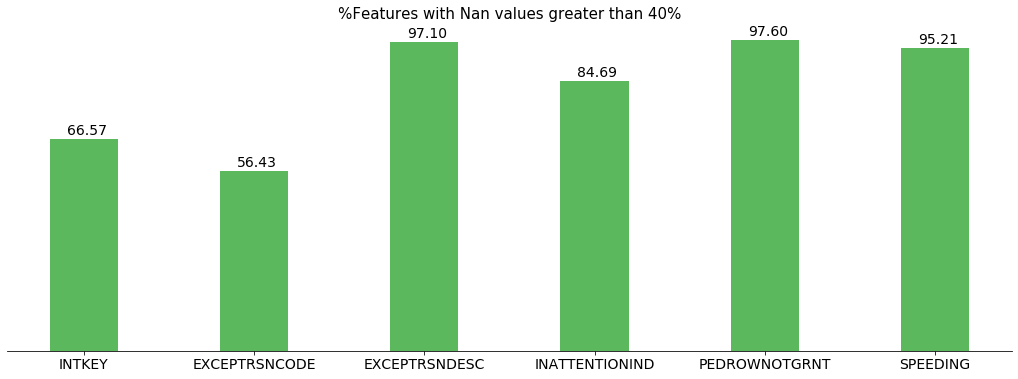

In [6]:
ax = nulls.plot(kind='bar', figsize=(18, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('%Features with Nan values greater than 40%', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels = nulls.index
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 1.5),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

### Label feature balance

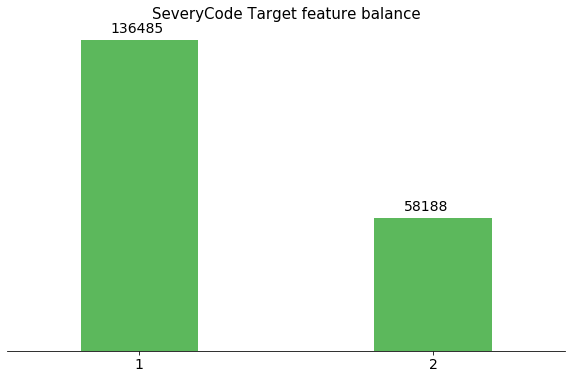

In [7]:
ax = df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(10, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('SeveryCode Target feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['SEVERITYCODE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+3500),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);


#### JUNCTIONTYPE vs ADDRTYPE 

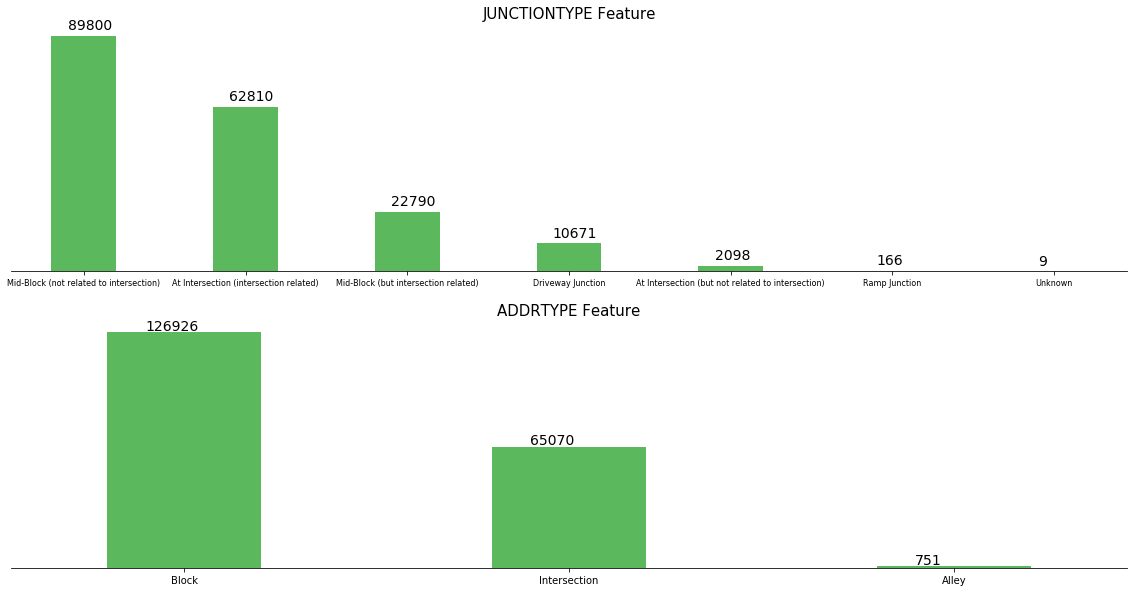

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['JUNCTIONTYPE'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('JUNCTIONTYPE Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_yaxis().set_ticks([])
xticklabels = df['JUNCTIONTYPE'].value_counts().index
for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 2500),fontsize=14)
ax[0].set_xticklabels(xticklabels, rotation = 0);
#-------
df['ADDRTYPE'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ADDRTYPE Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_yaxis().set_ticks([])
xticklabels = df['ADDRTYPE'].value_counts().index
for p in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 1500),fontsize=14)
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### Collision type feature

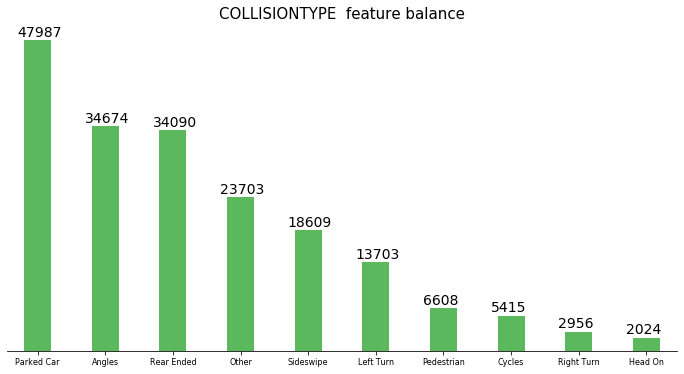

In [9]:
ax = df['COLLISIONTYPE'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('COLLISIONTYPE  feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['COLLISIONTYPE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.10, p.get_height()+600),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

#### SDOT_COLCODE vs ST_COLCODE

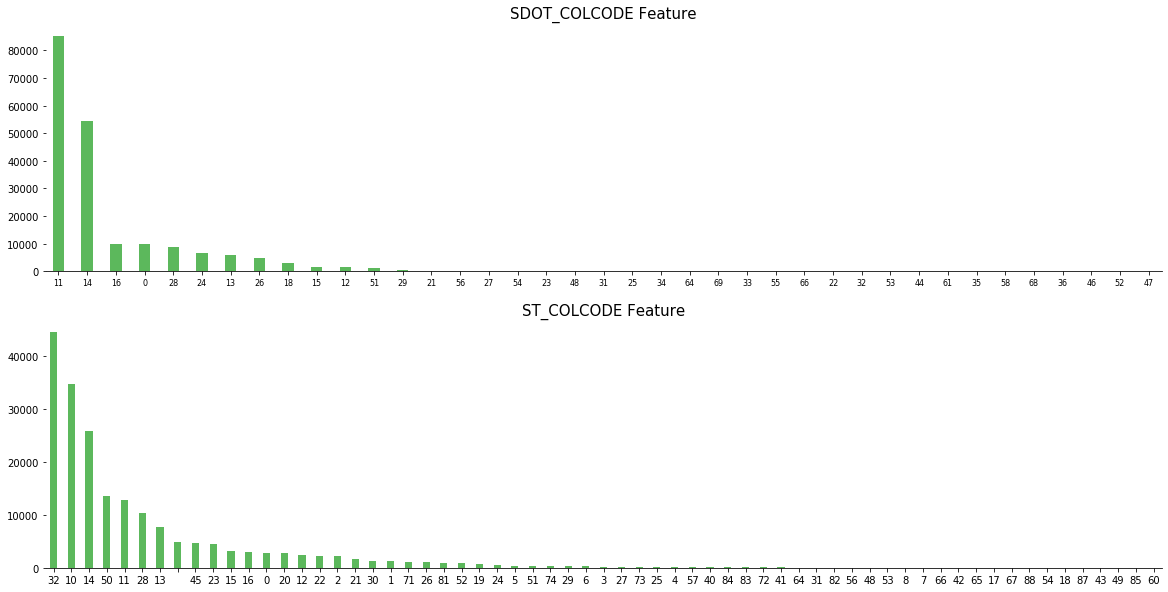

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['SDOT_COLCODE'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('SDOT_COLCODE Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
xticklabels = df['SDOT_COLCODE'].value_counts().index
ax[0].set_xticklabels(xticklabels, rotation = 0);
#-------
df['ST_COLCODE'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ST_COLCODE Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
xticklabels = df['ST_COLCODE'].value_counts().index
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### ROADCONDITION, WEATHER  FEATURES COMPARISON

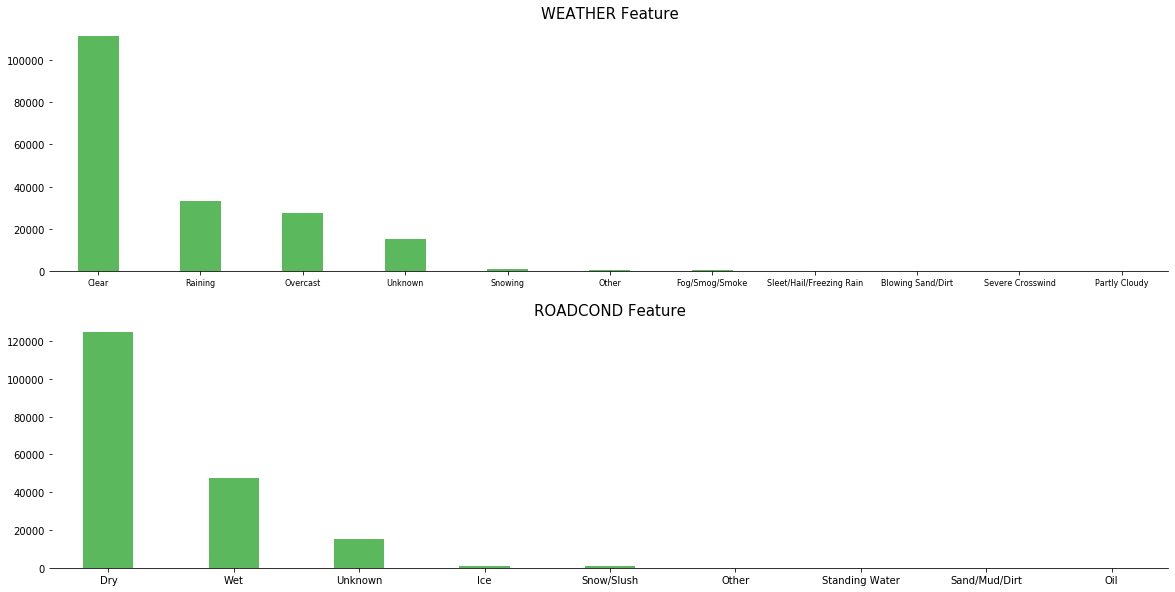

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['WEATHER'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('WEATHER Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
xticklabels = df['WEATHER'].value_counts().index
ax[0].set_xticklabels(xticklabels, rotation = 0)
#-------
df['ROADCOND'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ROADCOND Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
xticklabels = df['ROADCOND'].value_counts().index
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### PERSONCOUNT and VEHCOUNT

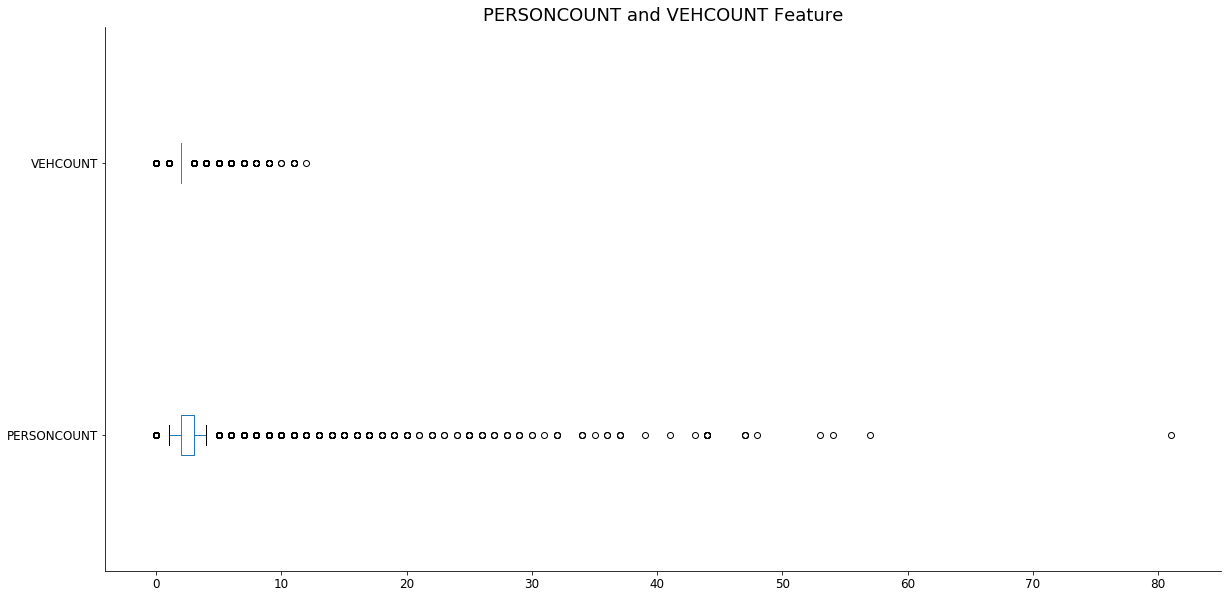

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
df[['PERSONCOUNT','VEHCOUNT']].plot(kind='box',ax=ax, vert=False)
ax.set_title('PERSONCOUNT and VEHCOUNT Feature', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
#xticklabels = df['PERSONCOUNT'].value_counts().index
#-------


In [44]:
#### UNDERINFL Feature

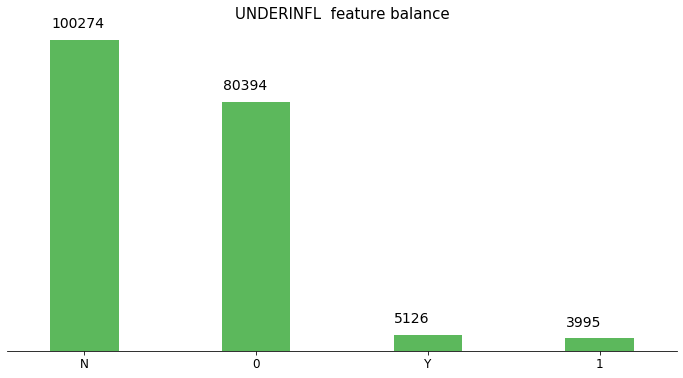

In [52]:
ax = df['UNDERINFL'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('UNDERINFL  feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['UNDERINFL'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.005, p.get_height()+4000),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

In [54]:
features = ['X', 'COLLISIONTYPE', 'VEHCOUNT', 'PERSONCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']

In [58]:
df[features].describe(include='all')

,X,COLLISIONTYPE,VEHCOUNT,PERSONCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
count,189339.000000,189769,194673.000000,194673.000000,194673,188344,189789,189661,189503,194655
unique,NaN,10,NaN,NaN,162058,7,4,9,9,63
top,NaN,Parked Car,NaN,NaN,11/2/2006,Mid-Block (not related to intersection),N,Dry,Daylight,32
freq,NaN,47987,NaN,NaN,96,89800,100274,124510,116137,44421
mean,-122.330518,NaN,1.920780,2.444427,NaN,NaN,NaN,NaN,NaN,NaN
std,0.029976,NaN,0.631047,1.345929,NaN,NaN,NaN,NaN,NaN,NaN
min,-122.419091,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,-122.348673,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,-122.330224,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,-122.311937,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
